##### Importing all necessary packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from termcolor import colored as cl 
import itertools # advanced tools

from sklearn.preprocessing import StandardScaler # this is for normalization
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 

##### Loading and cleaning the data 

In [2]:
url = 'https://github.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/blob/master/creditcard.csv?raw=true'
data = pd.read_csv(url)
data.drop('Time', axis = 1, inplace= True)

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
frauds = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]
print("Number of frauds:",len(frauds))
print("Non frauds:",len(non_fraud))

Number of frauds: 492
Non frauds: 284315


In [5]:
fraud_percentage = (len(frauds)/len(non_fraud)) * 100
print('The percentage of fraud cases is {:.3f}%'.format(fraud_percentage))

The percentage of fraud cases is 0.173%


##### Statistical overview of both cases

In [6]:
print("Frauds Stats")
print(frauds['Amount'].describe())
print("-------------------------------------------------")
print("Non Fraud Stats")
print(non_fraud['Amount'].describe())

Frauds Stats
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
-------------------------------------------------
Non Fraud Stats
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


###### Normalising the ammout feature

In [7]:
Standard_S = StandardScaler()
norm_data =Standard_S.fit_transform(data['Amount'].values.reshape(-1,1))
data['Amount'] = norm_data
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


##### Splitting the data into Trainning and Test set 

In [8]:
X = data.drop('Class', axis=1).values
y = data['Class'].values

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



###### Modeling

In [9]:
#K-Nearest Neighbors 

n = 5 
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

#Decision Tree
tree_m = DecisionTreeClassifier(max_depth = 4, criterion ='entropy')
tree_m.fit(X_train,y_train)
tree_yhat = tree_m.predict(X_test)


In [10]:

#SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

#Logist Regression
lr= LogisticRegression()
lr.fit(X_train,y_train)
lr_yhat = lr.predict(X_test)

#XGBoost
xgb = XGBClassifier(max_depth=4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

#Random Forest Tree
rf = RandomForestClassifier(max_depth=4)
rf.fit(X_train,y_train)
rf_yhat = rf.predict(X_test)

##### Accuracy Scores

In [11]:
print("The accuracy for the K-Nearest Neighbors model is {}".format(accuracy_score(y_test,knn_yhat)))
print("The accuracy for the Decision Tree model is {}".format(accuracy_score(y_test,tree_yhat)))
print("The accuracy for the SVM is {}".format(accuracy_score(y_test,svm_yhat)))
print("The accuracy for the Logist Regression is {}".format(accuracy_score(y_test,lr_yhat)))
print("The accuracy for the XGBoost model is {}".format(accuracy_score(y_test,xgb_yhat)))
print("The accuracy for the Random Forest Tree is {}".format(accuracy_score(y_test,rf_yhat)))

The accuracy for the K-Nearest Neighbors model is 0.9995259997893332
The accuracy for the Decision Tree model is 0.9993679997191109
The accuracy for the SVM is 0.9993153330290369
The accuracy for the Logist Regression is 0.9991924440855307
The accuracy for the XGBoost model is 0.9994733330992591
The accuracy for the Random Forest Tree is 0.9992977774656788


In [12]:
#F1 Score 

print("The accuracy for the K-Nearest Neighbors model is {}".format(f1_score(y_test,knn_yhat)))
print("The accuracy for the Decision Tree model is {}".format(f1_score(y_test,tree_yhat)))
print("The accuracy for the SVM is {}".format(f1_score(y_test,svm_yhat)))
print("The accuracy for the Logist Regression is {}".format(f1_score(y_test,lr_yhat)))
print("The accuracy for the XGBoost model is {}".format(f1_score(y_test,xgb_yhat)))
print("The accuracy for the Random Forest Tree is {}".format(f1_score(y_test,rf_yhat)))

The accuracy for the K-Nearest Neighbors model is 0.8571428571428572
The accuracy for the Decision Tree model is 0.8105263157894738
The accuracy for the SVM is 0.7771428571428572
The accuracy for the Logist Regression is 0.7356321839080459
The accuracy for the XGBoost model is 0.8421052631578948
The accuracy for the Random Forest Tree is 0.7727272727272727


###### Cofusion Matrix 

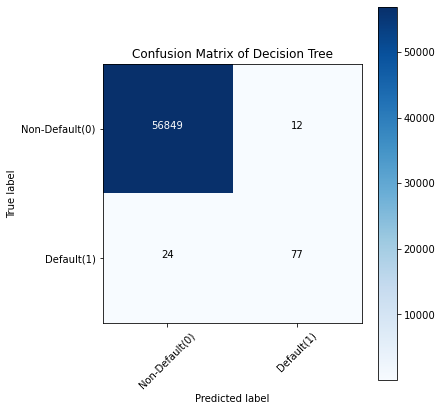

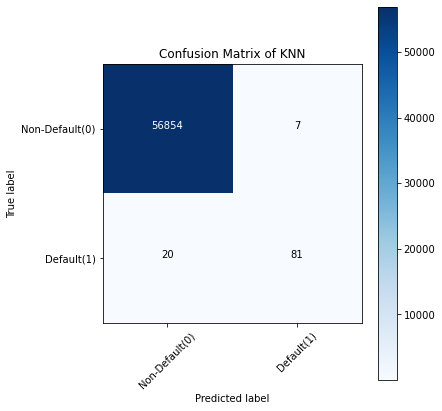

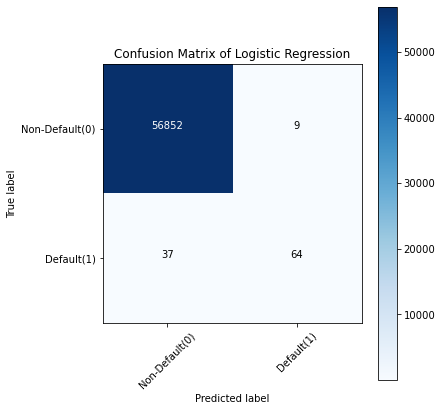

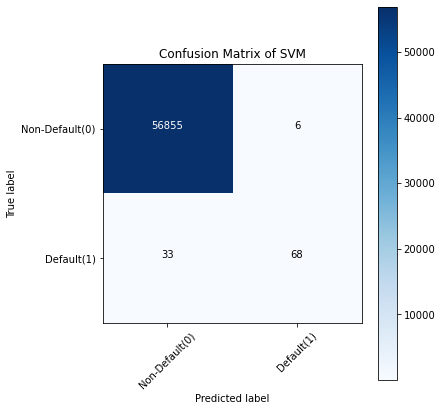

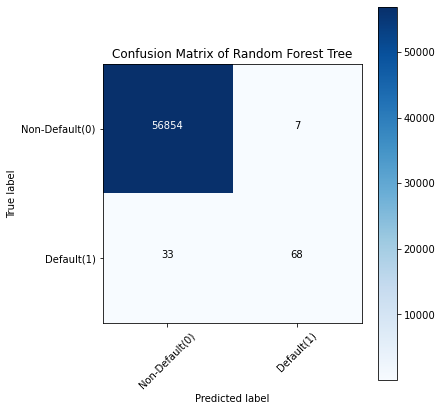

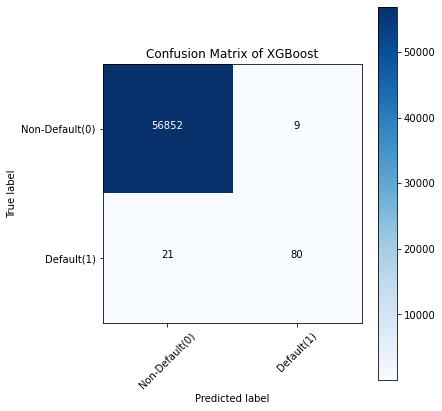

In [17]:


def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) 
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) 
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) 
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1])
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) 
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) 

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

# 4. Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

# 5. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

# 6. XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()